# Set up

In [24]:
import pandas as pd
import numpy as np
import json
import pickle

# Load training set

In [25]:
train_set = pd.read_pickle('train_set.pkl')
train_set

,claim,claimant,date,label,related_articles,id
9389,While arguing over President Reagan’s 1981 tax...,Sarah Sanders,2017-10-31,1,"[34218, 55700, 18736, 39031, 34219, 34220]",10354
1861,"Recently Rick Scott ""closed 30 women’s health ...",Lois Frankel,2014-09-12,0,"[73190, 76997, 38841, 77415, 77303, 9280, 8332...",2053
11035,Says Target installed urinals in a women’s bat...,Facebook posts,2016-04-22,0,"[9619, 22197]",12160
12221,"Says ""combined doses of vaccines"" have never b...",Facebook posts,2019-04-15,0,"[57163, 31528, 40908, 31536, 68904, 44601]",13458
11354,: The AMBER Alert system has been discontinu...,,2013-10-13,0,"[103978, 121475, 121849]",12504
...,...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,Republican Party of Florida,2014-09-23,1,"[9581, 89571, 7836, 7945, 7949, 77360, 83491, ...",3208
6096,"A photograph captures Harriet Tubman as a ""Gun...",,2019-03-25,0,"[125108, 125968, 126005]",6701
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",Jeanine Pirro,2014-06-14,0,"[80115, 93998, 5968, 175, 91475, 8710, 89881, ...",11514
5414,"""The board of a nonprofit organization on whic...",Tennessee Republican Party,2008-02-25,1,"[96453, 71123, 61, 69968, 96477]",5966


# Load test data

In [26]:
test_set = pd.read_pickle('test_set.pkl')

# Train model

In [27]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [28]:
X_train_claims = train_set.claim
y_train_claims = train_set.label
X_test_claims = test_set.claim
y_test_claims = test_set.label

In [29]:
sm = SMOTE()
cv = CountVectorizer()
nb = MultinomialNB()

In [34]:
pipeline1 = Pipeline([('cv', cv),('sm', sm), ('nb', nb)])
pipeline1.fit(X_train_claims, y_train_claims)

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('nb',
                 Mu

In [35]:
y_pred_claims = pipeline1.predict(X_test_claims)

In [36]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claims, y_pred_claims) * 100))
print("\nF1 Score: {:.6f}".format(f1_score(y_test_claims, y_pred_claims, average='macro')))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claims, y_pred_claims))

Accuracy: 58.73%

F1 Score: 0.487203

Confusion Matrix:
 [[843 513  98]
 [343 925  66]
 [ 95 169  59]]


Normalized Confusion Matrix
[[0.27097396 0.16489875 0.03150113]
 [0.11025394 0.29733205 0.02121504]
 [0.0305368  0.05432337 0.01896496]]


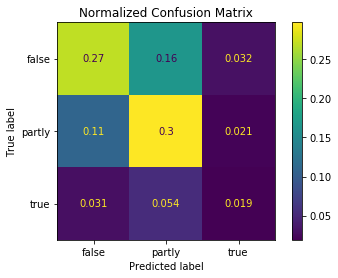

In [37]:
from sklearn.metrics import plot_confusion_matrix

title = "Normalized Confusion Matrix"
disp = plot_confusion_matrix(pipeline1, X_test_claims, y_test_claims, display_labels=['false', 'partly', 'true'], normalize='all')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

In [11]:
# with open("../models/train_claims_nb.pkl", 'wb') as f:
#     pickle.dump(pipeline1, f)

In [42]:
pipeline2 = Pipeline([('tv', tv),('sm', sm), ('nb', nb)])

In [43]:
pipeline2.fit(X_train_claims, y_train_claims)

Pipeline(memory=None,
         steps=[('tv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='de

In [45]:
y_pred_claims = pipeline2.predict(X_test_claims)

In [46]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claims, y_pred_claims) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test_claims, y_pred_claims, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claims, y_pred_claims))

Accuracy: 54.23%

F1 Score: 46.55

Confusion Matrix:
 [[801 461 192]
 [288 799 247]
 [ 92 144  87]]


In [17]:
X_train_claimants = train_set.claimant
y_train_claimants = train_set.label
X_test_claimants = test_set.claimant
y_test_claimants = test_set.label

In [18]:
pipeline3 = Pipeline([('cv', cv),('sm', sm), ('nb', nb)])

In [19]:
pipeline3.fit(X_train_claimants, y_train_claimants)

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('nb',
                 Mu

In [21]:
y_pred_claimants = pipeline3.predict(X_test_claimants)

In [23]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claimants, y_pred_claimants) * 100))
print("\nF1 Score: {:.6f}".format(f1_score(y_test_claimants, y_pred_claimants, average='macro')))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claimants, y_pred_claimants))

Accuracy: 53.97%

F1 Score: 0.440491

Confusion Matrix:
 [[1134  204  116]
 [ 536  467  331]
 [ 160   85   78]]


In [51]:
pipeline4 = Pipeline([('tv', tv),('sm', sm), ('nb', nb)])

In [52]:
pipeline4.fit(X_train_claimants, y_train_claimants)

Pipeline(memory=None,
         steps=[('tv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='de

In [53]:
y_pred_claimants = pipeline4.predict(X_test_claimants)

In [54]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claimants, y_pred_claimants) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test_claimants, y_pred_claimants, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claimants, y_pred_claimants))

Accuracy: 54.19%

F1 Score: 44.53

Confusion Matrix:
 [[1131  202  121]
 [ 523  472  339]
 [ 157   83   83]]


In [58]:
svc = LinearSVC()

pipeline5 = Pipeline([('tv', tv),('sm', sm), ('svc', svc)])

In [59]:
pipeline5.fit(X_train_claimants, y_train_claimants)

Pipeline(memory=None,
         steps=[('tv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u...
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,

In [60]:
y_pred_claimants = pipeline5.predict(X_test_claimants)

In [61]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claimants, y_pred_claimants) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test_claimants, y_pred_claimants, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claimants, y_pred_claimants))

Accuracy: 41.40%

F1 Score: 40.18

Confusion Matrix:
 [[513 236 705]
 [219 570 545]
 [ 30  88 205]]


In [62]:
pipeline6 = Pipeline([('cv', cv),('sm', sm), ('svc', svc)])

In [63]:
pipeline6.fit(X_train_claimants, y_train_claimants)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)...
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_in

In [64]:
y_pred_claimants = pipeline6.predict(X_test_claimants)

In [65]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_claimants, y_pred_claimants) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test_claimants, y_pred_claimants, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_claimants, y_pred_claimants))

Accuracy: 41.59%

F1 Score: 39.97

Confusion Matrix:
 [[517 245 692]
 [239 591 504]
 [ 33 104 186]]


In [67]:
# with open("../models/train_claimants_svm.pkl", 'wb') as f:
#     pickle.dump(pipeline4, f)

In [75]:
from imblearn.over_sampling import ADASYN

ad = ADASYN()

In [79]:
pipe1 = Pipeline([('cv', cv),('sm', sm), ('nb', nb)])

In [80]:
pipe1.fit(X_train_claimants, y_train_claimants)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('nb',
                 Mu